<a href="https://colab.research.google.com/github/sigvehaug/DSF-DCBP/blob/main/CodingTask2_Sol_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 2 - Solution examples


## Remarks regarding the submissions

- 14 submissions
- 1 submission by 3 people, the rest submitted individually
- All (?) used the findContours method from the openCV library
- Points from 7 to 12
- Generally it seems that active course participants are now able to attack data science tasks and problems with Python and develop solutions

## Questions ?
- ...

## Review some notebooks?
- ...


---



---



## Boundary Conditions
- Deadline (upload to Ilias): 2023-05-14 24:00
- Solutions in lecture on 2023-05-17
- Estimated effort: from 4 to 60 hours
- Images (data) on Ilias in the Data folder, the images.zip file
- Main notebook is number 11 for this task, however, also others may help you. You can also benefit a lot from googeling for code examples

## Subtasks (maximum 12.5 points)

1. Upload the images to a folder on your google drive. Write a function which 
retrieves the filenames of the images, contains a loop converting them to png images and saves them. [about 1 hour] [max 3 points] 

2. With some filtering and thresholding, write a function which converts the colored bins into nice white segments on a black background for one image. [about 1 hour][max 3 points]
3. Write an algorithm which counts the number of bins. First approach could be a "sliding window" algorithm, i.e a loop sliding over the image and counting regions with substantial white content. There may also be nice segmentation tools out "there" already. You may google. [about 4 hours][max 3 points] 
4. Write an algorithm which does the latter task on all images. As the images are quite different, this is a large task which goes beyond the time budget of this exercise, however, you can give it a try. If it works out for a couple of images, that is already good. [from 4 to 50 hours][max 3.5 points]

Work in teams and have fun ! 

In [2]:
# First we need some tools
!pip install pillow_heif
from google.colab import drive
drive.mount('/content/drive')
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import skimage.io as io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 36.9 MB/s eta 0:00:00
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!pip install pyheif
import pyheif

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 47.6 MB/s eta 0:00:00


In [9]:
# Task 2.1 - Convert images to png
#def heic2png():
url_pre  = '/content/drive/MyDrive/Courses/DSF-DCBP/Data-Images/'
files  = os.listdir(url_pre)
images = []
for url_name in files:
  if url_name.split('.')[-1] == 'HEIC':
   heif_file = pyheif.read(url_pre+url_name)
   image = Image.frombytes(heif_file.mode,heif_file.size,heif_file.data,"raw",)
   url_name = url_name.split('.')[0]+'.png'
   image.save(url_pre+url_name, format="png")
   images.append(url_pre+url_name)
print(images)

['/content/drive/MyDrive/Courses/DSF-DCBP/Data-Images/IMG_5392.png', '/content/drive/MyDrive/Courses/DSF-DCBP/Data-Images/IMG_5389.png', '/content/drive/MyDrive/Courses/DSF-DCBP/Data-Images/IMG_5391.png', '/content/drive/MyDrive/Courses/DSF-DCBP/Data-Images/IMG_5382.png', '/content/drive/MyDrive/Courses/DSF-DCBP/Data-Images/IMG_5381.png', '/content/drive/MyDrive/Courses/DSF-DCBP/Data-Images/IMG_5384.png', '/content/drive/MyDrive/Courses/DSF-DCBP/Data-Images/IMG_5390.png', '/content/drive/MyDrive/Courses/DSF-DCBP/Data-Images/IMG_5388.png', '/content/drive/MyDrive/Courses/DSF-DCBP/Data-Images/IMG_5379.png', '/content/drive/MyDrive/Courses/DSF-DCBP/Data-Images/IMG_5380.png', '/content/drive/MyDrive/Courses/DSF-DCBP/Data-Images/IMG_5393.png', '/content/drive/MyDrive/Courses/DSF-DCBP/Data-Images/IMG_5383.png', '/content/drive/MyDrive/Courses/DSF-DCBP/Data-Images/IMG_5386.png', '/content/drive/MyDrive/Courses/DSF-DCBP/Data-Images/IMG_5387.png', '/content/drive/MyDrive/Courses/DSF-DCBP/Data-I

(2016, 3024)


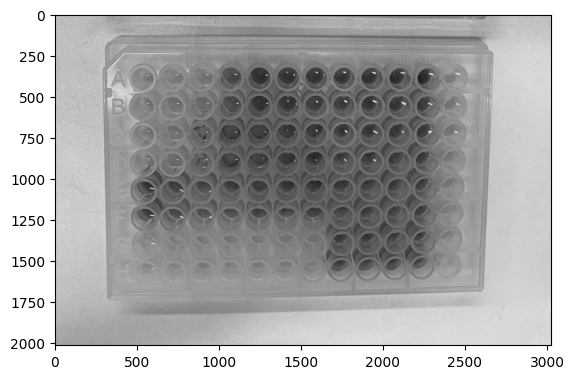

In [10]:
# Task 2.2 - Filter an image threshold it into good black white separation
# Preprocess images with filter and threshold
#for img in images:
imageRGB  = io.imread(images[0])
image = imageRGB[:,:,2]
image = image[image.shape[0]//2:image.shape[0],:]
print(image.shape)
plt.imshow(image, cmap ='gray')
plt.show()

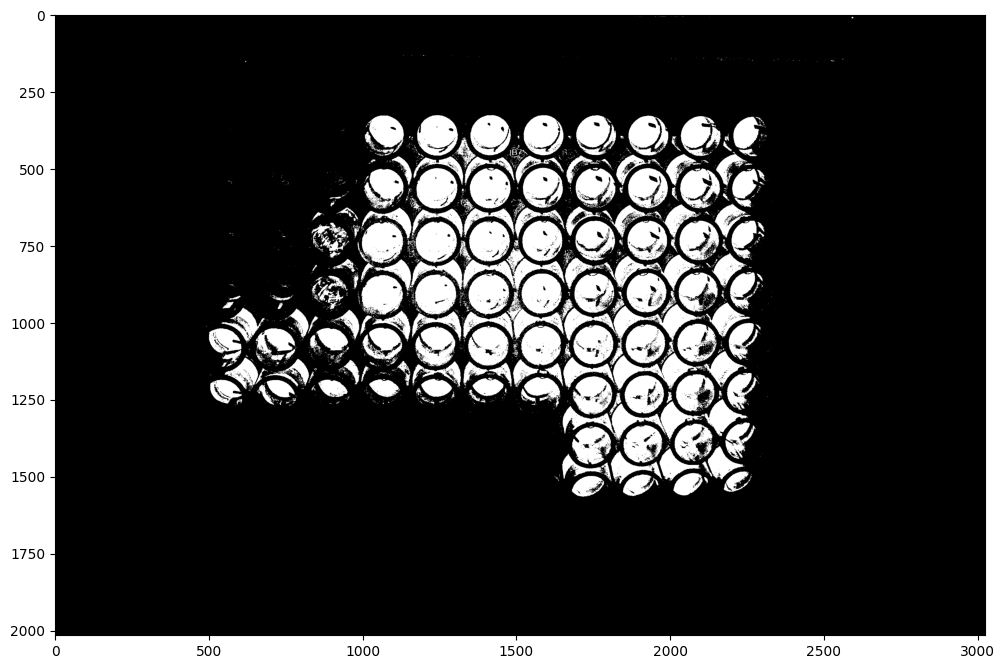

In [11]:
image_threshold = image < 100
plt.figure(figsize=(12, 12))
plt.imshow(image_threshold, cmap ='gray')
plt.show()
matplotlib.image.imsave('image-bw.png', image_threshold)
#image_threshold.save(url_pre+url_name, format="png")

Algorithm counts  59  bins out of 64 counted by eye.


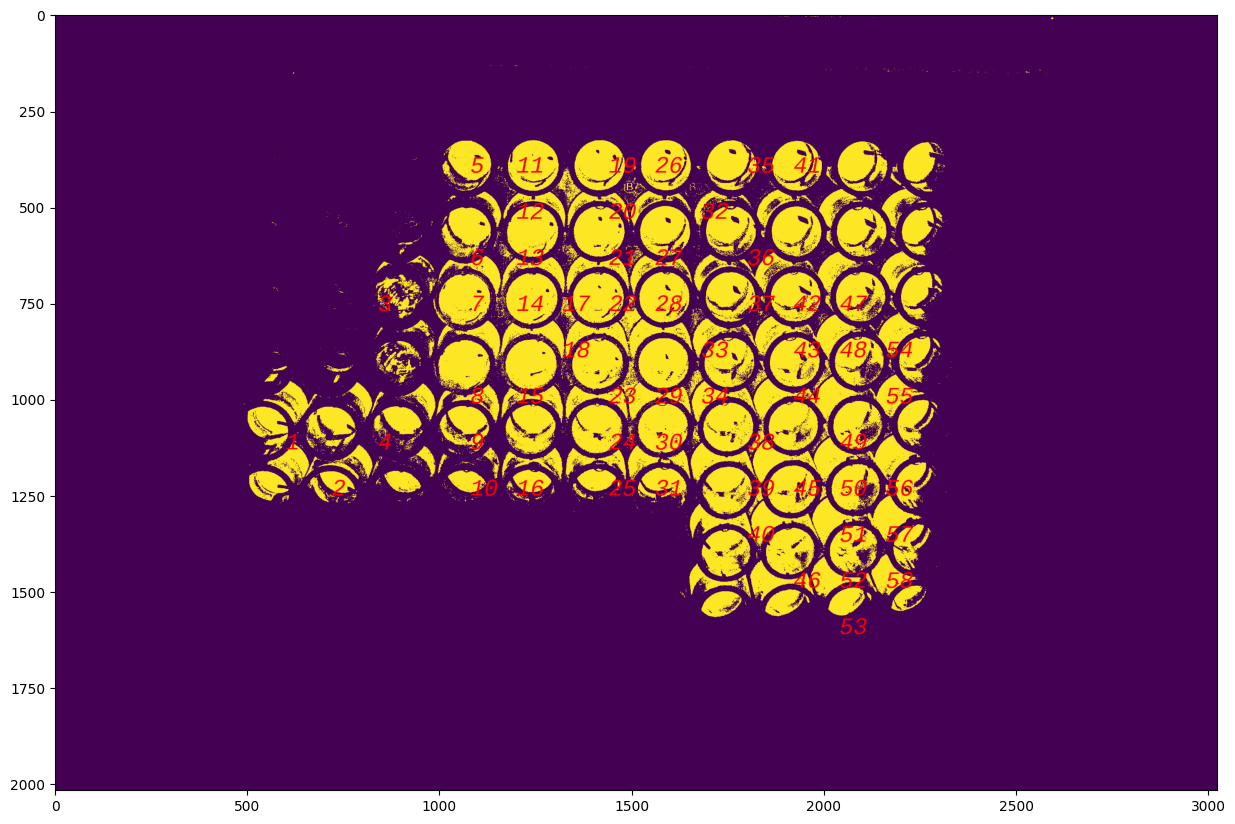

In [12]:
# Task 2.3 - Count the colored bins - approach sliding window and threshold
from PIL import Image, ImageDraw, ImageFont

stepsize  = 120
threshold = 200

image = Image.open('image-bw.png')
pixels = image.load()
size = image.size
draw = ImageDraw.Draw(image)
font = ImageFont.truetype('LiberationMono-Italic.ttf', 60)
i = 1
for x in range(0, size[0], stepsize):
    for y in range(0, size[1], stepsize):
        if pixels[x, y][1] > threshold:
            draw.text((x, y), str(i), (255, 0, 0), font=font)
            i += 1
image.save('result.png')
plt.figure(figsize=(15,15))
plt.imshow(image)
print('Algorithm counts ',i,' bins out of 64 counted by eye.')

In [13]:
# Task 2.4 - Code to count bins on all available pictures
from PIL import Image, ImageDraw, ImageFont

stepsize  = 120
threshold = 200
# We counted the colored wells in class:
ground_truth = {'IMG_5379':52,'IMG_5380':47,'IMG_5381':62,'IMG_5382':45,\
                'IMG_5383':46,'IMG_5384':32,'IMG_5385':52,\
                'IMG_5386':51,'IMG_5387':48,'IMG_5388':70,'IMG_5389':55,\
                'IMG_5390':58,'IMG_5391':40,'IMG_5392':63,\
                'IMG_5393':60}

url_pre  = '/content/drive/MyDrive/Courses/DSF-DCBP/Data-Images/'
files  = os.listdir(url_pre)
image_files = []
for url_name in files:
  if url_name.split('.')[-1] == 'png': image_files.append(url_name)
image_files.sort()

for file in image_files:
  image = Image.open(url_pre+file)
  pixels = image.load()
  size = image.size
  draw = ImageDraw.Draw(image)
  font = ImageFont.truetype('LiberationMono-Italic.ttf', 60)
  i = 1
  for x in range(0, size[0], stepsize):
    for y in range(0, size[1], stepsize):
        if pixels[x, y][1] > threshold:
            draw.text((x, y), str(i), (255, 0, 0), font=font)
            i += 1
  image.save(file+'res.png')
  #plt.figure(figsize=(15,15))
  #plt.imshow(image)
  gt = ground_truth[file.split('.')[0]]
  print('For ',file,' the algorithm counts ',i,' bins out of ',gt,'counted by eye.')  

For  IMG_5379.png  the algorithm counts  41  bins out of  52 counted by eye.
For  IMG_5380.png  the algorithm counts  76  bins out of  47 counted by eye.
For  IMG_5381.png  the algorithm counts  54  bins out of  62 counted by eye.
For  IMG_5382.png  the algorithm counts  55  bins out of  45 counted by eye.
For  IMG_5383.png  the algorithm counts  60  bins out of  46 counted by eye.
For  IMG_5384.png  the algorithm counts  18  bins out of  32 counted by eye.
For  IMG_5385.png  the algorithm counts  70  bins out of  52 counted by eye.
For  IMG_5386.png  the algorithm counts  56  bins out of  51 counted by eye.
For  IMG_5387.png  the algorithm counts  54  bins out of  48 counted by eye.
For  IMG_5388.png  the algorithm counts  67  bins out of  70 counted by eye.
For  IMG_5389.png  the algorithm counts  76  bins out of  55 counted by eye.
For  IMG_5390.png  the algorithm counts  88  bins out of  58 counted by eye.
For  IMG_5391.png  the algorithm counts  92  bins out of  40 counted by eye.

Conclusion : The algorithm still needs substantial optimisation. Or we could try using this software: https://www.cellpose.org/.



---



In 2022 most people in class, if not all, applied findContours from the openCV library. That is probably a very good solution. In 2023 a student used the blob_log method from the skimage. That also worked well.


---



# Some snippets for a superpixel approach follow

Another approach for task 2.3 could be to make superpixels, i.e. reduce the resolution to roughly the bin size, and then count pixels above a certain threshold.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.


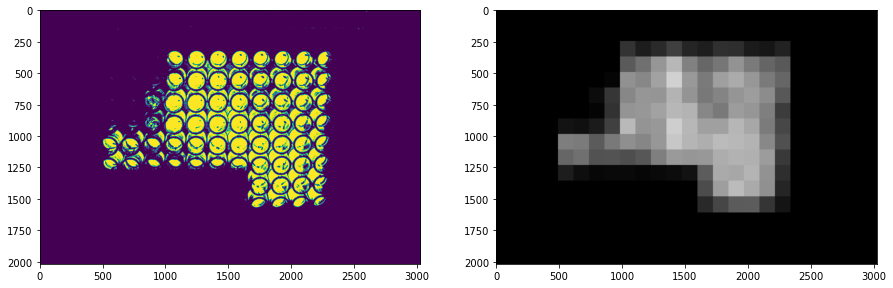

In [ ]:

# Code from https://www.geeksforgeeks.org/image-segmentation-using-pythons-scikit-image-module/
# Importing required libraries
from skimage.segmentation import slic
from skimage.data import astronaut
from skimage.color import label2rgb
 
# Setting the plot size as 15, 15
plt.figure(figsize=(15,15))
 
# Sample Image of scikit-image package
astronaut = image_threshold
 
# Applying Simple Linear Iterative
# Clustering on the image
# - 50 segments & compactness = 10
astronaut_segments = slic(astronaut,
                          n_segments=400,
                          compactness=10)
plt.subplot(1,2,1)
# Plotting the original image
plt.imshow(astronaut)
plt.subplot(1,2,2)
 
# Converts a label image into
# an RGB color image for visualizing
# the labeled regions.
plt.imshow(label2rgb(astronaut_segments,
                     astronaut,
                     kind = 'avg'))

In [ ]:
# Show available fonts on colab
#! fc-list